In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [248]:
train = pd.read_csv("data/train.csv")

In [249]:
test = pd.read_csv("data/test.csv")

In [250]:
train.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/2018,05/04/2018,06/04/2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/2015,11/04/2015,16/04/2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/2015,01/02/2015,05/02/2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/2015,11/06/2015,16/06/2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/2015,14/12/2015,19/12/2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [251]:
test.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/2018,05/04/2018,06/04/2018,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/2015,23/06/2015,27/06/2015,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/2015,07/08/2015,10/08/2015,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/2015,22/10/2015,25/10/2015,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/2016,01/10/2016,05/10/2016,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [252]:
train.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


In [253]:
test.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code
count,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146765.000000,146730.000000,144505.000000,146765.000000,146765.000000,146765.000000
mean,1.902068,2.204483,3.275897,0.362287,209.179852,1.774101,2.196675,2.888754,3.730372,2.681088,7.254206,4.750560,3.188410,1.123354
std,0.914653,0.817804,1.783842,0.758218,862.926844,0.753281,1.544679,0.804043,2.482388,0.882366,4.755982,3.101036,1.163872,0.328844
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000
max,3.000000,7.000000,32.000000,10.000000,4995.000000,3.000000,7.000000,6.000000,80.000000,4.000000,38.000000,13.000000,21.000000,2.000000


In [254]:
train.reservation_id.unique().size

341424

In [255]:
print("reservation_id: {}, booking_date: {}, checkin_date: {}, checkout_date: {}, memberid: {}, resort_id: {}".format(train.reservation_id.unique().size,
                                                                                                     train.booking_date.unique().size,
                                                                                                     train.checkin_date.unique().size,
                                                                                                     train.checkout_date.unique().size,train.memberid.unique().size,train.resort_id.unique().size))


reservation_id: 341424, booking_date: 1621, checkin_date: 1532, checkout_date: 1531, memberid: 101327, resort_id: 32


In [256]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [257]:
 from sklearn.preprocessing import Imputer
 imputer = Imputer(missing_values='NaN',strategy='most_frequent',axis=0)  
 imputer = imputer.fit(train[['season_holidayed_code']])
 train['season_holidayed_code']= imputer.transform(train[['season_holidayed_code']])

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [258]:
 test['season_holidayed_code']= imputer.transform(test[['season_holidayed_code']])

In [259]:
train = train[train.roomnights != -45]

In [260]:
train[['state_code_residence']] = train[['state_code_residence']].fillna(value=17)

In [261]:
test[['state_code_residence']] = test[['state_code_residence']].fillna(value=17)

In [262]:
train.isna().sum()

reservation_id                        0
booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
dtype: int64

In [263]:
test.isna().sum()

reservation_id              0
booking_date                0
checkin_date                0
checkout_date               0
channel_code                0
main_product_code           0
numberofadults              0
numberofchildren            0
persontravellingid          0
resort_region_code          0
resort_type_code            0
room_type_booked_code       0
roomnights                  0
season_holidayed_code       0
state_code_residence        0
state_code_resort           0
total_pax                   0
member_age_buckets          0
booking_type_code           0
memberid                    0
cluster_code                0
reservationstatusid_code    0
resort_id                   0
dtype: int64

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341423 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341423 non-null object
booking_date                          341423 non-null object
checkin_date                          341423 non-null object
checkout_date                         341423 non-null object
channel_code                          341423 non-null int64
main_product_code                     341423 non-null int64
numberofadults                        341423 non-null int64
numberofchildren                      341423 non-null int64
persontravellingid                    341423 non-null int64
resort_region_code                    341423 non-null int64
resort_type_code                      341423 non-null int64
room_type_booked_code                 341423 non-null int64
roomnights                            341423 non-null int64
season_holidayed_code                 341423 non-null float64
state_code_residence                  34142

In [265]:
# Remove D it has only one row
train = train[train.reservationstatusid_code != 'D']

In [15]:
from datetime import datetime

In [12]:
def convert_booking_date(row):
    return datetime.strptime(row['booking_date'], '%d/%m/%Y')

def convert_checkin_date(row):
    return datetime.strptime(row['checkin_date'], '%d/%m/%Y') 

def convert_checkout_date(row):
    return datetime.strptime(row['checkout_date'], '%d/%m/%Y') 

In [268]:
train['booking_date'] = train.apply(convert_booking_date, axis=1)

In [269]:
train['checkin_date'] = train.apply(convert_checkin_date, axis=1)

In [270]:
train['checkout_date'] = train.apply(convert_checkout_date, axis=1)

In [271]:
train['actual_days'] = (train['checkout_date'] - train['checkin_date']).dt.days

In [13]:
def convert_booking_date_t(row):
    return datetime.strptime(row['booking_date'], '%d/%m/%Y')

def convert_checkin_date_t(row):
    return datetime.strptime(row['checkin_date'], '%d/%m/%Y') 

def convert_checkout_date_t(row):
    return datetime.strptime(row['checkout_date'], '%d/%m/%Y') 

In [273]:
test['booking_date'] = test.apply(convert_booking_date_t, axis=1)

In [274]:
test['checkin_date'] = test.apply(convert_checkin_date_t, axis=1)

In [275]:
test['checkout_date'] = test.apply(convert_checkout_date_t, axis=1)

In [276]:
test['actual_days'] = (test['checkout_date'] - test['checkin_date']).dt.days

In [277]:
from IPython.display import display
pd.options.display.max_columns = None

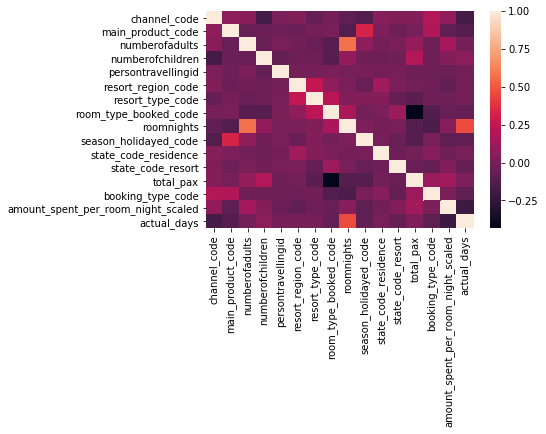

In [278]:
sb.heatmap(train.corr())

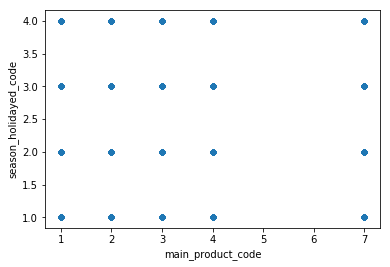

In [299]:
train.plot(kind='scatter', x='main_product_code', y='season_holidayed_code')

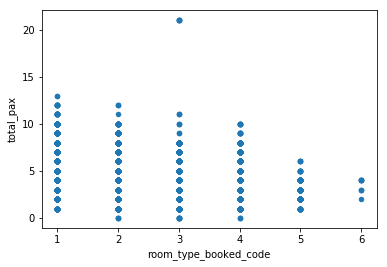

In [300]:
train.plot(kind='scatter', x='room_type_booked_code', y='total_pax')

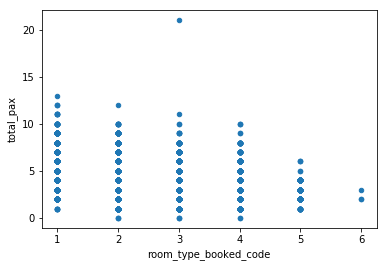

In [301]:
test.plot(kind='scatter', x='room_type_booked_code', y='total_pax')

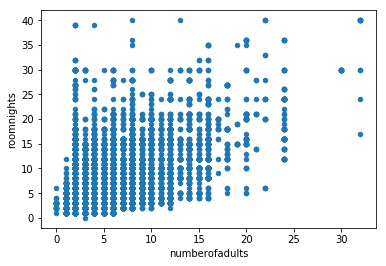

In [302]:
train.plot(kind='scatter', x='numberofadults', y='roomnights') 

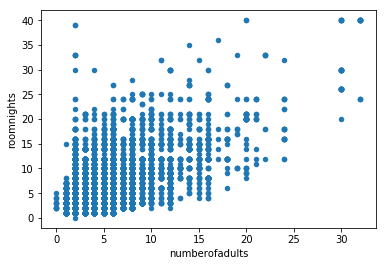

In [303]:
test.plot(kind='scatter', x='numberofadults', y='roomnights') 

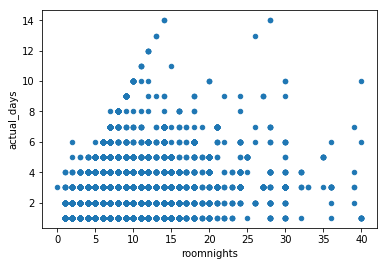

In [304]:
train.plot(kind='scatter', x='roomnights', y='actual_days')

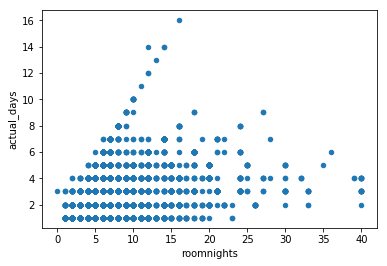

In [305]:
test.plot(kind='scatter', x='roomnights', y='actual_days')

In [279]:
#TRAIN - remove total_pax 24 and cap above 13 to 21 
train = train[train.total_pax != 24]

In [280]:
train.loc[(train.total_pax > 13), "total_pax"] = 21

In [281]:
#TRAIN - actual days above 15 removed
train = train[train.actual_days < 15]

In [282]:
def replace_roomnight(row):
    if row['roomnights'] == 80:
        return 3
    else:
        return row['roomnights']

In [283]:
#TEST - change roomnights 80 to 3
test['roomnights'] = test.apply(replace_roomnight, axis=1)

In [284]:
#TRAIN - numberofchildren remove 13 and cap 12 to 10
train = train[train.numberofchildren != 15]

In [285]:
def replace_child(row):
    if row['numberofchildren'] == 12:
        return 10
    else:
        return row['numberofchildren']

In [286]:
train['numberofchildren'] = train.apply(replace_child, axis = 1)

In [287]:
#TEST - numberofchildren cap 9 to 10
def replace_child_t(row):
    if row['numberofchildren'] == 9:
        return 10
    else:
        return row['numberofchildren']

In [288]:
test['numberofchildren'] = test.apply(replace_child_t, axis = 1)

In [289]:
#TRAIN - remove numberofadults 23 and 25
train = train[~train['numberofadults'].isin([23,25])]

In [290]:
#TEST - numberofadults cap 29 to 30 and change children to 0
def replace_adult_t(row):
    if row['numberofadults'] == 29:
        return 30
    else:
        return row['numberofadults']
    
def replace_child_adult(row):
    if row['numberofadults'] == 30:
        return 0
    else:
        return row['numberofchildren']
    

In [291]:
test['numberofadults'] = test.apply(replace_adult_t, axis = 1)

In [292]:
test['numberofchildren'] = test.apply(replace_child_adult, axis = 1)

In [293]:
# TRAIN - roomnights cap 29, 31, 34, to 30 and 37,41,42,47,60 to 40
def replace_roomnights(row):
    if row['roomnights'] in [29,31,34,37]:
        return 30
    elif row['roomnights'] in [41,42,47,60]:
        return 40
    else:
        return row['roomnights']

In [294]:
train['roomnights'] = train.apply(replace_roomnights, axis = 1)

In [295]:
# TEST - roomnights cap 40,44,48 to 40
def replace_roomnights_t(row):
    if row['roomnights'] in [40,44,48]:
        return 40
    else:
        return row['roomnights']

In [296]:
test['roomnights'] = test.apply(replace_roomnights_t, axis = 1)

In [321]:
train['booking_checkin_days'] = (train['checkin_date'] - train['booking_date']).dt.days

In [322]:
train['booking_checkout_days'] = (train['checkout_date'] - train['booking_date']).dt.days

In [323]:
test['booking_checkin_days'] = (test['checkin_date'] - test['booking_date']).dt.days

In [324]:
test['booking_checkout_days'] = (test['checkout_date'] - test['booking_date']).dt.days

In [325]:
train.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [326]:
test.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days'],
      dtype='object')

In [327]:
train = train[['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days', 'amount_spent_per_room_night_scaled']]

In [2]:
train_v2 = pd.read_csv("data/train_v2.csv").iloc[:, 1:]
test_v2 = pd.read_csv("data/test_v2.csv").iloc[:, 1:]

In [3]:
train_v2.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,actual_days,booking_checkin_days,booking_checkout_days,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/2018,05/04/2018,06/04/2018,3,1,2,0,46,3,...,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,1,0,1,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/2015,11/04/2015,16/04/2015,1,1,2,0,46,3,...,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,5,78,83,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/2015,01/02/2015,05/02/2015,1,1,2,0,47,1,...,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,4,4,8,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/2015,11/06/2015,16/06/2015,1,1,2,2,46,2,...,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5,40,45,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/2015,14/12/2015,19/12/2015,1,1,2,0,46,2,...,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5,103,108,7.059346


In [4]:
train_v2 = train_v2[train_v2.booking_checkin_days >= 0]

In [5]:
train_df = train_v2
test_df = test_v2

In [6]:
test_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,actual_days,booking_checkin_days,booking_checkout_days
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/2018,05/04/2018,06/04/2018,3,2,2,0,45,3,...,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...,1,0,1
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/2015,23/06/2015,27/06/2015,1,2,4,0,45,1,...,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...,4,30,34
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/2015,07/08/2015,10/08/2015,3,2,3,0,45,2,...,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,3,17,20
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/2015,22/10/2015,25/10/2015,1,2,3,0,45,1,...,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,3,83,86
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/2016,01/10/2016,05/10/2016,1,2,4,0,45,1,...,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...,4,92,96


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341392 entries, 0 to 341396
Data columns (total 27 columns):
reservation_id                        341392 non-null object
booking_date                          341392 non-null object
checkin_date                          341392 non-null object
checkout_date                         341392 non-null object
channel_code                          341392 non-null int64
main_product_code                     341392 non-null int64
numberofadults                        341392 non-null int64
numberofchildren                      341392 non-null int64
persontravellingid                    341392 non-null int64
resort_region_code                    341392 non-null int64
resort_type_code                      341392 non-null int64
room_type_booked_code                 341392 non-null int64
roomnights                            341392 non-null int64
season_holidayed_code                 341392 non-null int64
state_code_residence                  341392 

In [379]:
tmpvar = {}
col_index = {}

for i in train_df.columns:
    tmpvar[i] = train_df[i].unique().size
    col_index[i] = train_df.columns.get_loc(i)


In [380]:
tmpvar

{'reservation_id': 341392,
 'booking_date': 1621,
 'checkin_date': 1527,
 'checkout_date': 1527,
 'channel_code': 3,
 'main_product_code': 5,
 'numberofadults': 26,
 'numberofchildren': 11,
 'persontravellingid': 6,
 'resort_region_code': 3,
 'resort_type_code': 7,
 'room_type_booked_code': 6,
 'roomnights': 36,
 'season_holidayed_code': 4,
 'state_code_residence': 38,
 'state_code_resort': 11,
 'total_pax': 15,
 'member_age_buckets': 10,
 'booking_type_code': 2,
 'memberid': 101327,
 'cluster_code': 6,
 'reservationstatusid_code': 3,
 'resort_id': 32,
 'actual_days': 14,
 'booking_checkin_days': 127,
 'booking_checkout_days': 129,
 'amount_spent_per_room_night_scaled': 278059}

In [381]:
tmpvar_test = {}
col_index_test = {}

for i in test_df.columns:
    tmpvar_test[i] = test_df[i].unique().size
    col_index_test[i] = test_df.columns.get_loc(i)

In [382]:
tmpvar_test

{'reservation_id': 146765,
 'booking_date': 1620,
 'checkin_date': 1523,
 'checkout_date': 1524,
 'channel_code': 3,
 'main_product_code': 5,
 'numberofadults': 26,
 'numberofchildren': 10,
 'persontravellingid': 6,
 'resort_region_code': 3,
 'resort_type_code': 7,
 'room_type_booked_code': 6,
 'roomnights': 36,
 'season_holidayed_code': 4,
 'state_code_residence': 38,
 'state_code_resort': 11,
 'total_pax': 15,
 'member_age_buckets': 10,
 'booking_type_code': 2,
 'memberid': 43496,
 'cluster_code': 6,
 'reservationstatusid_code': 3,
 'resort_id': 32,
 'actual_days': 15,
 'booking_checkin_days': 126,
 'booking_checkout_days': 131}

In [8]:
# Dropping MEMBER ID coz it will create issue in the model.
train_df = train_df.drop(['memberid'], axis=1)
test_df = test_df.drop(['memberid'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for i in ['member_age_buckets','cluster_code','reservationstatusid_code','resort_id']:
    label_encoder = LabelEncoder()
    fitted = label_encoder.fit(train_df[i]) 
    train_df[i] = fitted.transform(train_df[i])
    test_df[i] = fitted.transform(test_df[i])

In [16]:
train_df['checkin_date'] = train_df.apply(convert_checkin_date, axis=1)

In [17]:
test_df['checkin_date'] = test_df.apply(convert_checkin_date_t, axis=1)

In [18]:
# Extracting month may help in identifying vacation months.
train_df['booking_month'] = train_df['checkin_date'].dt.month

In [19]:
test_df['booking_month'] = test_df['checkin_date'].dt.month

In [20]:
def mark_vacation(row):
    if row['booking_month'] in [12,1,4,5]:
        return 1
    else:
        return 0

In [21]:
train_df['is_vacation'] = train_df.apply(mark_vacation, axis=1)
test_df['is_vacation'] = test_df.apply(mark_vacation, axis=1)

In [22]:
train_df = train_df[['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days',
       'booking_month', 'is_vacation', 'amount_spent_per_room_night_scaled']]

In [23]:
#Drop Date columns
train_df = train_df.drop(['booking_date'], axis=1)
test_df = test_df.drop(['booking_date'], axis=1)

train_df = train_df.drop(['checkin_date'], axis=1)
test_df = test_df.drop(['checkin_date'], axis=1)

train_df = train_df.drop(['checkout_date'], axis=1)
test_df = test_df.drop(['checkout_date'], axis=1)


In [24]:
train_df.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,...,booking_type_code,cluster_code,reservationstatusid_code,resort_id,actual_days,booking_checkin_days,booking_checkout_days,booking_month,is_vacation,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,3,1,2,0,46,3,3,3,1,...,1,5,2,7,1,0,1,4,1,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,1,1,2,0,46,3,3,4,5,...,1,5,0,1,5,78,83,4,1,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,1,1,2,0,47,1,5,4,4,...,1,4,0,9,4,4,8,2,0,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,1,1,2,2,46,2,2,3,5,...,1,3,0,25,5,40,45,6,0,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,1,1,2,0,46,2,2,4,5,...,1,3,0,25,5,103,108,12,1,7.059346


In [25]:
def replace_child_n(row):
    if row['numberofchildren'] > 10:
        return 10
    else:
        return row['numberofchildren']

In [26]:
train_df['numberofchildren'] = train_df.apply(replace_child_n, axis=1)

In [545]:
train_df = train_df.drop(['booking_checkin_days'], axis=1)
test_df = test_df.drop(['booking_checkin_days'], axis=1)

train_df = train_df.drop(['booking_checkout_days'], axis=1)
test_df = test_df.drop(['booking_checkout_days'], axis=1)

In [579]:
train_df = train_df.drop(['booking_month'], axis=1)
test_df = test_df.drop(['booking_month'], axis=1)

In [619]:
train_df = train_df.drop(['actual_days'], axis=1)
test_df = test_df.drop(['actual_days'], axis=1)

In [39]:
train_df_lbd = train_df
test_df_lbd = test_df

In [40]:
train_df_lbd.columns.size

25

In [41]:
train_df_lbd.head()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,...,booking_type_code,cluster_code,reservationstatusid_code,resort_id,actual_days,booking_checkin_days,booking_checkout_days,booking_month,is_vacation,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,3,1,2,0,46,3,3,3,1,...,1,5,2,7,1,0,1,4,1,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,1,1,2,0,46,3,3,4,5,...,1,5,0,1,5,78,83,4,1,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,1,1,2,0,47,1,5,4,4,...,1,4,0,9,4,4,8,2,0,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,1,1,2,2,46,2,2,3,5,...,1,3,0,25,5,40,45,6,0,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,1,1,2,0,46,2,2,4,5,...,1,3,0,25,5,103,108,12,1,7.059346


In [42]:
X_reservation_id = train_df_lbd.iloc[:, 0].values
train_df_lbd = train_df_lbd.drop(['reservation_id'], axis=1)

X2_reservation_id = test_df_lbd.iloc[:, 0].values
test_df_lbd = test_df_lbd.drop(['reservation_id'], axis=1)

In [43]:
y = train_df_lbd.iloc[:, 23].values
train_df_lbd = train_df_lbd.drop(['amount_spent_per_room_night_scaled'], axis=1)

In [44]:
y

array([7.70642846, 6.66256293, 7.87160208, ..., 8.38193917, 8.85603547,
       7.86462734])

In [45]:
train_df_lbd.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days', 'booking_month',
       'is_vacation'],
      dtype='object')

In [46]:
test_df_lbd.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id', 'actual_days',
       'booking_checkin_days', 'booking_checkout_days', 'booking_month',
       'is_vacation'],
      dtype='object')

In [47]:
train_df_lbd_one = pd.get_dummies(train_df_lbd, columns= ['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'is_vacation'], drop_first=True)

In [48]:
test_df_lbd_one = pd.get_dummies(test_df_lbd, columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'is_vacation'], drop_first=True)

In [49]:
train_df_lbd_one.head()

,actual_days,booking_checkin_days,booking_checkout_days,booking_month,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,...,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31,is_vacation_1
0,1,0,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,78,83,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,4,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,40,45,6,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,103,108,12,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
train_df_lbd_one.columns

Index(['actual_days', 'booking_checkin_days', 'booking_checkout_days',
       'booking_month', 'channel_code_2', 'channel_code_3',
       'main_product_code_2', 'main_product_code_3', 'main_product_code_4',
       'main_product_code_7',
       ...
       'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26',
       'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_30',
       'resort_id_31', 'is_vacation_1'],
      dtype='object', length=210)

In [51]:
test_df_lbd_one.columns

Index(['actual_days', 'booking_checkin_days', 'booking_checkout_days',
       'booking_month', 'channel_code_2', 'channel_code_3',
       'main_product_code_2', 'main_product_code_3', 'main_product_code_4',
       'main_product_code_7',
       ...
       'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26',
       'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_30',
       'resort_id_31', 'is_vacation_1'],
      dtype='object', length=210)

In [54]:
for i in test_df_lbd_one.columns:
    if i not in train_df_lbd_one.columns:
        print(i)

In [ ]:
numberofchildren_13
booking_checkin_days_125
booking_checkin_days_126

In [523]:
train_df_lbd_one = train_df_lbd_one.drop(['numberofchildren_13'], axis=1)
train_df_lbd_one = train_df_lbd_one.drop(['booking_checkin_days_125'], axis=1)
train_df_lbd_one = train_df_lbd_one.drop(['booking_checkin_days_126'], axis=1)

In [593]:
test_df_lbd_one = test_df_lbd_one.drop(['actual_days_16'], axis=1)
#test_df_lbd_one = test_df_lbd_one.drop(['booking_checkin_days_177'], axis=1)
#test_df_lbd_one = test_df_lbd_one.drop(['booking_checkout_days_130'], axis=1)
#test_df_lbd_one = test_df_lbd_one.drop(['booking_checkout_days_180'], axis=1)

In [55]:
X = train_df_lbd_one.iloc[:, 0:].values
X2 = test_df_lbd_one.iloc[:, 0:].values # Test SET

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X2_Scaled = sc.transform(X2)
"""

'\n# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\nX2_Scaled = sc.transform(X2)\n'

In [ ]:
len(X_train[0])

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [59]:
import tensorflow as tf

In [61]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [64]:
with tf.device('/device:GPU:0'):
    # Initialising the ANN
    Regressior = Sequential()
    
    # Adding the input layer and the first hidden layer
    Regressior.add(Dense(units=210, kernel_initializer='uniform', activation='relu', input_dim=210))
    
    # Adding the second hidden layer
    Regressior.add(Dense(units=210, kernel_initializer='uniform', activation='relu'))
    
    # Adding the third hidden layer
    Regressior.add(Dense(units=210, kernel_initializer='uniform', activation='relu'))
    
    # Adding the output layer
    Regressior.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    
    # Compiling the ANN
    Regressior.compile(loss='mse', optimizer='adam', metrics=[rmse])
    
    # Fitting the ANN to the Training set
    Regressior.fit(X_train, y_train, batch_size=5000, epochs=50, validation_split=0.1)

Train on 245801 samples, validate on 27312 samples
Epoch 1/50
245801/245801 [==============================] - 1s 5us/sample - loss: 13.9537 - rmse: 2.8785 - val_loss: 1.9262 - val_rmse: 1.0868
Epoch 2/50
245801/245801 [==============================] - 1s 4us/sample - loss: 1.4471 - rmse: 0.9113 - val_loss: 1.2722 - val_rmse: 0.8319
Epoch 3/50
245801/245801 [==============================] - 1s 4us/sample - loss: 1.1528 - rmse: 0.8008 - val_loss: 1.1236 - val_rmse: 0.7774
Epoch 4/50
245801/245801 [==============================] - 1s 4us/sample - loss: 1.0610 - rmse: 0.7629 - val_loss: 1.0740 - val_rmse: 0.7814
Epoch 5/50
245801/245801 [==============================] - 1s 4us/sample - loss: 1.0274 - rmse: 0.7488 - val_loss: 1.0648 - val_rmse: 0.7869
Epoch 6/50
245801/245801 [==============================] - 1s 4us/sample - loss: 1.0107 - rmse: 0.7416 - val_loss: 1.0305 - val_rmse: 0.7509
Epoch 7/50
245801/245801 [==============================] - 1s 4us/sample - loss: 0.9993 - rmse:

In [65]:
y_pred= Regressior.predict(X_test)

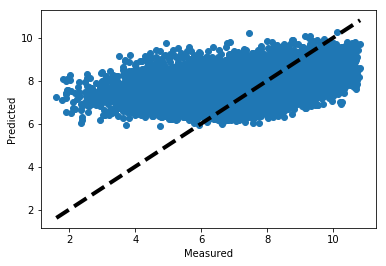

In [67]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
Submit = Regressior.predict(X2_Scaled)

In [613]:
Submit.reshape(146765,)

array([7.7572117, 7.5140996, 7.268451 , ..., 8.027311 , 7.137011 ,
       7.750776 ], dtype=float32)

In [614]:
X2_reservation_id.shape

(146765,)

In [615]:
Submission = pd.DataFrame({'reservation_id':X2_reservation_id,'amount_spent_per_room_night_scaled':np.around(Submit.reshape(146765,))})

In [616]:
Submission['amount_spent_per_room_night_scaled'] = Submission.amount_spent_per_room_night_scaled.astype(int)

In [617]:
Submission.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,8
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,8
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,8


In [618]:
Submission.to_csv("submission_four.csv", index=False)

In [298]:
test.roomnights.unique()

array([ 1,  8,  3,  4,  2,  5,  6,  7, 12, 20, 10, 15,  9, 16, 25, 18, 14,
       24, 17, 11, 32, 21, 13, 28, 36, 30, 39, 19, 40, 22, 23, 33, 27, 26,
        0, 35], dtype=int64)

In [243]:
train_room = [ 1,  5,  4,  2,  6,  3,  8, 12, 16,  9,  7, 10, 14, 15, 11, 22, 18,
       25, 20, 13, 21, 26, 30, 17, 24, 27, 39, 28, 19, 23, 36, 40, 33, 35,
       32,  0]
test_room = [ 1,  8,  3,  4,  2,  5,  6,  7, 12, 20, 10, 15,  9, 16, 25, 18, 14,
       24, 17, 11, 32, 21, 13, 28, 36, 30, 39, 19, 40, 22, 23, 33, 27, 26,
        0, 35]

In [244]:
train_room.sort()
test_room.sort()

test_room